<a href="https://colab.research.google.com/github/manakmishra/heart-failure-ids-project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Team Details:**


*   Govind Rathi (18UCC004)
*   Pursharth Maheshwari (18UCC059)
*   Manak Mishra (18UCC104)
*   Pratham Khandelwal (18UCC141)


## **Objective:**

Our problem statement is to use the given heart failure clinical record dataset to determine if a patient can die from heart failure by applying ML Classification algorithms on the data set to get inferences from the data. 

## **Introduction to the dataset:**

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 12 clinical features. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old.

The dataset contains 12 input features and 1 output feature, which report several clinical and lifestyle information discussed here. Some features are binary/boolean: anaemia, high blood pressure, diabetes, sex, and smoking. A patient is considered having anaemia if haematocrit levels were lower than 36%. 

Some of the other features are discussed below:
*   Creatinine Phosphokinase (CPK) states the level of the CPK enzyme in blood. When a muscle tissue gets damaged, CPK flows into the blood. Therefore, high levels of CPK in the blood of a patient might indicate a heart failure or injury
*   The ejection fraction states the percentage of how much blood the left ventricle pumps out with each contraction.
*   The serum creatinine is a waste product generated by creatine, when a muscle breaks down. If a patient has high levels of serum creatinine, it may indicate renal dysfunction.
*    The serum sodium test is a routine blood exam that indicates if a patient has normal levels of sodium in the blood. An abnormally low level of sodium in the blood might be caused by heart failure.

**Source of this dataset:** https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

## **Imported Libraries**

In [ ]:
#libraries for graphs and plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#library for PCA
from sklearn.decomposition import PCA

#libraries for ML classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#libraries for classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#libraries for roc curve
from sklearn.metrics import roc_curve, roc_auc_score

#google colab related libraries
from google.colab import files
import io
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

## **Table Description**

### **1. There are 299 rows and 13 columns in the dataset.**

In [ ]:
#importing the dataset from source
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))
 
data = df.values
 
#finding number of rows and columns
print(data.shape)

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
(299, 13)


In [ ]:
# First 10 entries of the dataset
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### **2. Column Description**

*   **age:** Age of the patient (years)
*   **anaemia:** Decrease of red blood cells or hemoglobin (boolean)
*   **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
*   **diabetes:** If the patient has diabetes (boolean)
*   **ejection_fraction:** Percentage of blood leaving the heart at each contraction (percentage)
*   **high_blood_pressure:** If the patient has hypertension (boolean)
*   **platelets:** Platelets in the blood (kiloplatelets/mL)
*   **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
*   **serum_sodium:** Level of serum sodium in the blood (mEq/L)
*   **sex:** woman or man (binary)
*   **smoking:** If the patient smokes or not (boolean)
*   **time:** Follow-up period (days)
*   **DEATH_EVENT (target feature):** If the patient deceased during the follow-up period (boolean)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### **3. Observations from Dataset**


1.   All attributes are non-null numeric attributes.
2.   There are 11 features and 1 output (*DEATH_EVENT*). '0' indicates if the patient survived whereas '1' indicates otherwise. 

### **4. Finding contributions of *DEATH_EVENT* (0 or 1) in the dataset**

In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Hence, 203 patients survived whereas 96 patients died due to heart failure.

## **Data Overview**

### **Bar Graph**

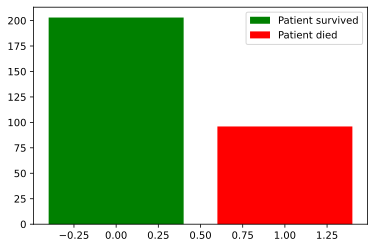

In [ ]:
indices1 = np.array([0])
count1 = np.array([203])
indices2 = np.array([0])
count2 = np.array([96])

plt.bar(indices1,count1,color='green',label='Patient survived')
plt.bar(indices2+1,count2,color='red',label='Patient died')
plt.legend()
plt.show()

### **Pie Chart**

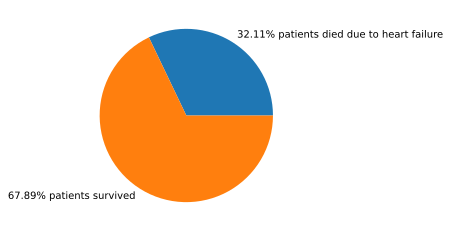

In [ ]:
labels = ['32.11% patients died due to heart failure', '67.89% patients survived']
values = [96, 203]

plt.pie(values, labels=labels, radius=1)
plt.show()

This shows a class imbalance problem. 

### **Box Plots**

The box plots give us some insight into our dataset:

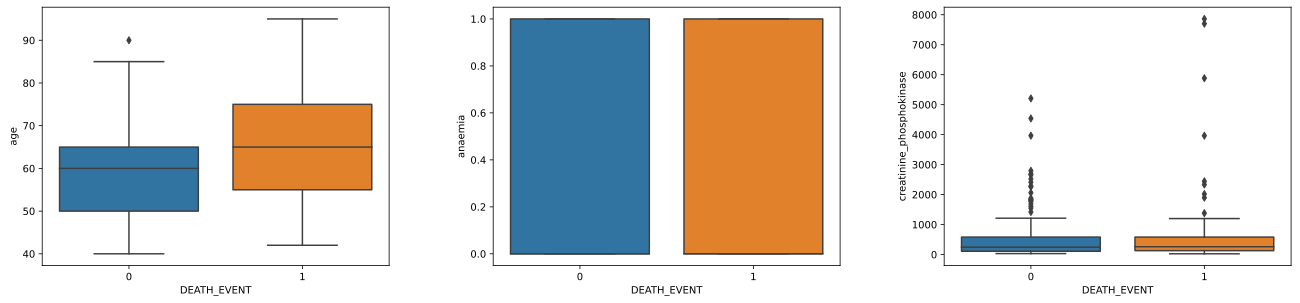

In [ ]:
left = 0.1
right = 3
bottom = 0.1
top = 1
wspace = 0.3
hspace = 0.2

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot(x='DEATH_EVENT', y='age', data = df, ax=axes[0])
sns.boxplot(x='DEATH_EVENT', y='anaemia', data = df, orient='v' , ax=axes[1])
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data = df, orient='v' , ax=axes[2])

*   The elderly patients are at a higher risk of being deceased due to heart failure.

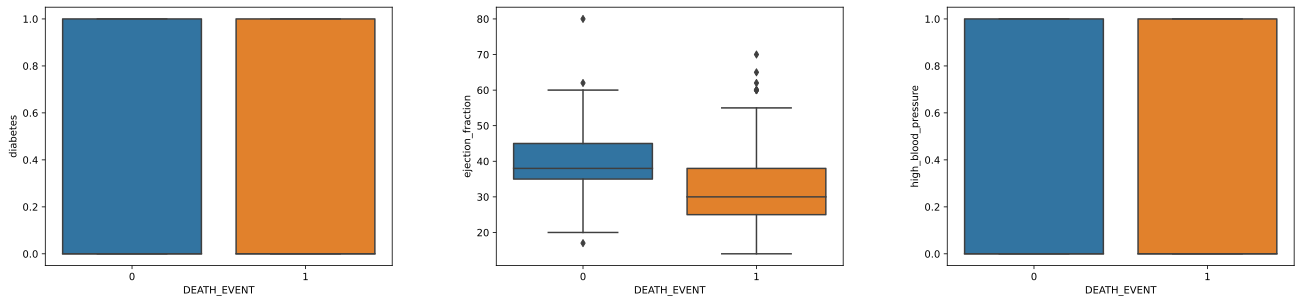

In [ ]:
f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot(x='DEATH_EVENT', y='diabetes', data = df, orient='v' , ax=axes[0])
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data = df, orient='v' , ax=axes[1])
sns.boxplot(x='DEATH_EVENT', y='high_blood_pressure', data = df, orient='v' , ax=axes[2])

*  Patients with lower ejection fraction are at a higher risk.



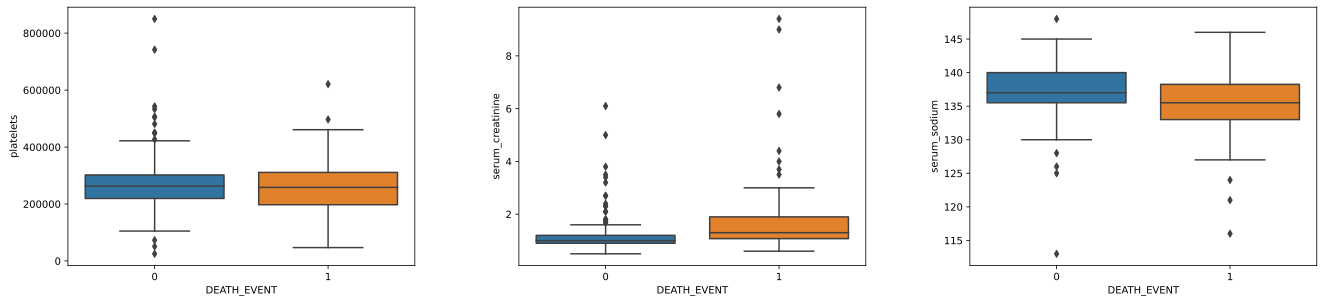

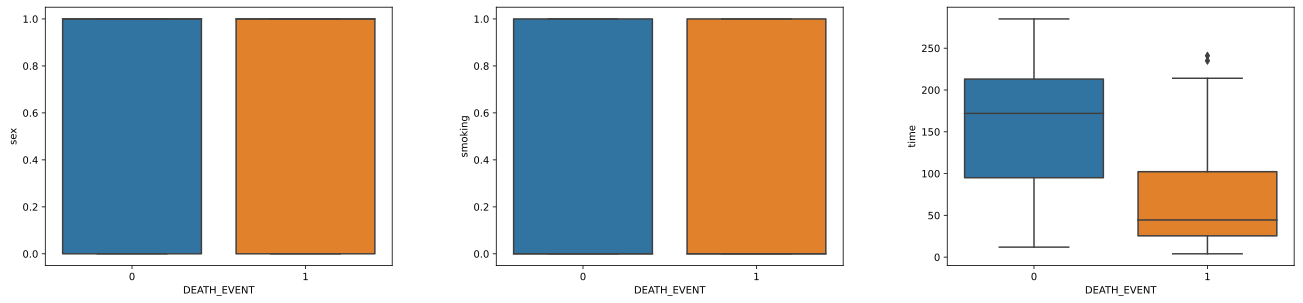

In [ ]:
f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot(x='DEATH_EVENT', y='platelets', data = df, orient='v' , ax=axes[0])
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data = df, orient='v' , ax=axes[1])
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data = df, orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot(x='DEATH_EVENT', y='sex', data = df, orient='v' , ax=axes[0])
sns.boxplot(x='DEATH_EVENT', y='smoking', data = df, orient='v' , ax=axes[1])
sns.boxplot(x='DEATH_EVENT', y='time', data = df, orient='v' , ax=axes[2])

*  Patients with higher serum creatinine values are at a higher risk.
*  Patients who are deceased due to heart failure generally have a lower serum sodium values.

### **Correlation Matrix**

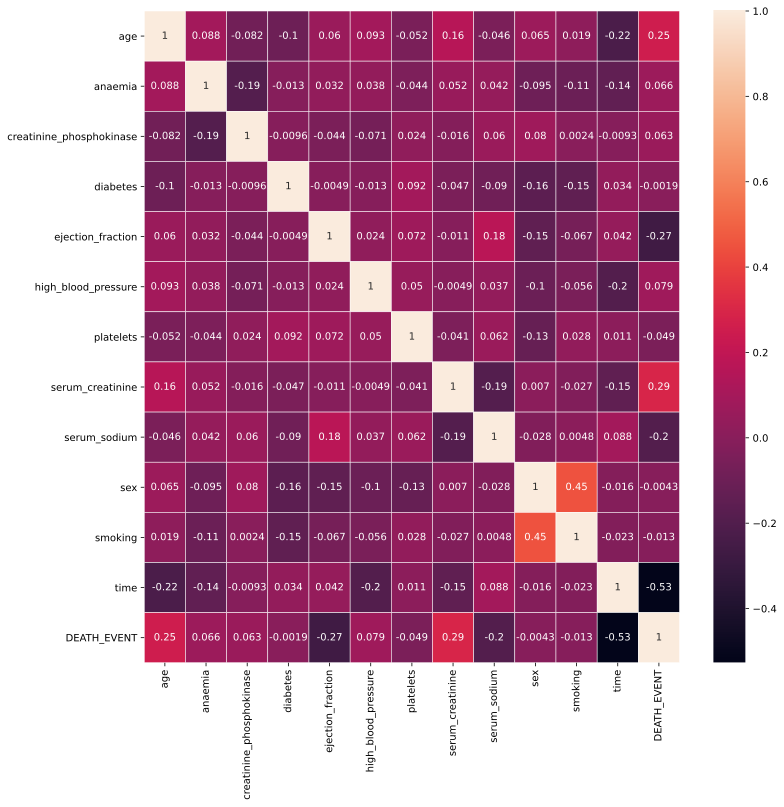

In [ ]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, ax=ax)

By observing this correlation matrix, we can say that *diabetes* and *sex* is least correlated with the output attribute *DEATH_EVENT*. Hence, we can drop this.

In [ ]:
df.drop(['diabetes', 'sex'], axis=1, inplace=True)

### **Description of all the attributes**

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,38.083612,0.351171,263358.029264,1.39388,136.625418,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,11.834841,0.478136,97804.236869,1.03451,4.412477,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.00000,285.000000,1.00000


## **Data Preprocessing**



All attributes are non-null in this dataset. Hence, we can proceed with the processing of data.

### **Binarization**

In our dataset, all attributes are numeric hence no attributes need to binarize. Thus, we can proceed further.

### **Normalization using MinMax scaler function**

Since all attributes in our dataset have varying ranges, we need to normalize the attributes so that each attribute contributes equally in the prediction of class labels.

In [ ]:
def normalize(df):
  result = df.copy()
  for feature_name in df.columns:
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result

data=normalize(df)
data.head(10)

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.090909,1.0,0.290823,0.157303,0.485714,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.363636,0.0,0.288833,0.067416,0.657143,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.090909,0.0,0.165960,0.089888,0.457143,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.090909,0.0,0.224148,0.157303,0.685714,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.014235,1.0
5,0.909091,1.0,0.003062,0.393939,1.0,0.216875,0.179775,0.542857,1.0,0.014235,1.0
6,0.636364,1.0,0.028451,0.015152,0.0,0.123530,0.078652,0.685714,0.0,0.021352,1.0
7,0.363636,1.0,0.037254,0.696970,0.0,0.519942,0.067416,0.514286,1.0,0.021352,1.0
8,0.454545,0.0,0.017096,0.772727,0.0,0.288833,0.112360,0.714286,0.0,0.021352,1.0
9,0.727273,1.0,0.012758,0.318182,1.0,0.439932,1.000000,0.571429,1.0,0.021352,1.0


After normalization, all attributes lie between 0 and 1.

### **Filtering the Unimportant Variables (Principal Component Analysis)**

In [ ]:
#useful data
useful_data = df
pca = PCA(n_components=3)
pca.fit(useful_data)

#Dimension indexing
dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]

#Individual PCA components
components = pd.DataFrame(np.round(pca.components_, 5), columns=useful_data.keys())
components.index = dimensions

#Explained Variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variance_rations = pd.DataFrame(np.round(ratios,4),columns=['Explained Variance'])
variance_rations.index = dimensions

#printing required information
pd.set_option('display.max_columns', None)
print(pd.concat([variance_rations, components], axis=1))

             Explained Variance      age  anaemia  creatinine_phosphokinase  \
Dimension 1              0.9999 -0.00001 -0.00000                   0.00024   
Dimension 2              0.0001 -0.00099 -0.00010                   1.00000   
Dimension 3              0.0000 -0.03513 -0.00091                   0.00074   

             ejection_fraction  high_blood_pressure  platelets  \
Dimension 1            0.00001              0.00000    1.00000   
Dimension 2           -0.00056             -0.00004   -0.00024   
Dimension 3            0.00627             -0.00122   -0.00001   

             serum_creatinine  serum_sodium  smoking     time  DEATH_EVENT  
Dimension 1          -0.00000       0.00000  0.00000  0.00001     -0.00000  
Dimension 2          -0.00002       0.00026  0.00000 -0.00077      0.00003  
Dimension 3          -0.00200       0.00501 -0.00014  0.99934     -0.00317  


It can be observed that 99.99% variance is explained in Dimension 1. Rest of the dimensions contribute much less to the variance when compared to Dimension 1. In Dimension 1, most of the feature weight is associated with *platelets* (100%). Thus, this attribute will be the most important for analysis. Attributes such as *anaemia*, *smoking* and *high_blood_pressure* have very little weights associated with them. Hence, dropping these won't affect our analysis. 

In [ ]:
#Dropping the above stated attributes
df.drop(['anaemia', 'smoking', 'high_blood_pressure'], axis=1, inplace=True)
data.drop(['anaemia', 'smoking', 'high_blood_pressure'], axis=1, inplace=True)
data.head(10)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,1.0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,1.0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,1.0
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1.0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1.0
5,0.909091,0.003062,0.393939,0.216875,0.179775,0.542857,0.014235,1.0
6,0.636364,0.028451,0.015152,0.123530,0.078652,0.685714,0.021352,1.0
7,0.363636,0.037254,0.696970,0.519942,0.067416,0.514286,0.021352,1.0
8,0.454545,0.017096,0.772727,0.288833,0.112360,0.714286,0.021352,1.0
9,0.727273,0.012758,0.318182,0.439932,1.000000,0.571429,0.021352,1.0


## **Classification and Prediction**

### **Choosing the Classification Model**

As our dataset is small and numerical, we would use the KNN method of classification. Also since we have binary classification (*0 if patient survived and 1 otherwise*), we can use logistic regression model as well.

### **Importing the training sets**

In [ ]:
x = data.iloc[:,0:7]
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

### **Applying K-NN Classifier on Training Dataset**

We have considered 1-25 nearest neighbours and observed the recall.

In [ ]:
knn = KNeighborsClassifier()
k_range = list(range(1,25))
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  k_scores.append(knn.score(X_train, y_train))

print(np.round(k_scores, 4))

[1.     0.8852 0.9139 0.8947 0.8947 0.866  0.8756 0.8469 0.8565 0.823
 0.8469 0.823  0.8469 0.8421 0.8517 0.8421 0.8612 0.8469 0.8517 0.8373
 0.8421 0.823  0.8325 0.8134]


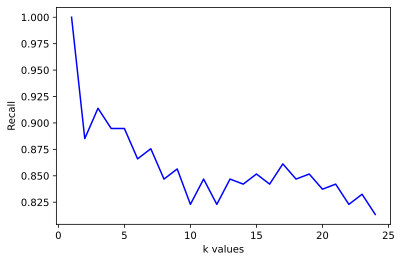

In [ ]:
#k-value vs recall plot
plt.plot(k_range, k_scores, color="Blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

We can not take value of k as 1 (even though it has maximum recall) as such a small value of k can lead to noise sensitive classification. We need a trade-off between k-value and recall. Thus , we choose a value of k such that neither it is too small nor too large.Also, recall should not be compromised. Here, we take k-value as 5.

#### **Classification Report**

Accuracy score:  0.8 

Classfication report: 
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86        60
         1.0       0.83      0.50      0.62        30

    accuracy                           0.80        90
   macro avg       0.81      0.72      0.74        90
weighted avg       0.81      0.80      0.78        90



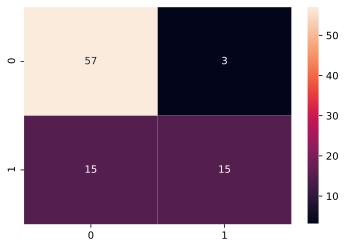

In [ ]:
#Fit training data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Prediction on test data
y_pred = classifier.predict(X_test)

#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print ("Accuracy score: ", accuracy_score(y_test,y_pred), '\n')
print ("Classfication report: ")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt="d")

### **Logistic Regression and Classification Report**

Accuracy:  0.7666666666666667 

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.95      0.84        60
         1.0       0.80      0.40      0.53        30

    accuracy                           0.77        90
   macro avg       0.78      0.68      0.69        90
weighted avg       0.77      0.77      0.74        90



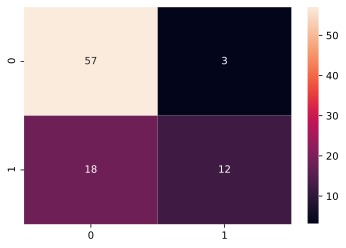

In [ ]:
#Logistic Regression
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

#Accuracy and Classification Report
print('Accuracy: ', accuracy_score(y_test,log_predicted), '\n')
print('Classification Report: \n', classification_report(y_test,log_predicted))
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

#### **Computing ROC Curve and ROC Area for both classification models**

Since our dataset has a class imbalance problem, calculating accuracy is not a good measure for evaluation of classification models. So we will plot the Receiver Operating Characteristic curve and calculate the Area-under-the-curve to get a better comparative look at the classification models used.

roc_auc_score for K-Nearest Neighbors (k=5):  0.9294947121034077
roc_auc_score for Logistic Regression:  0.854289071680376




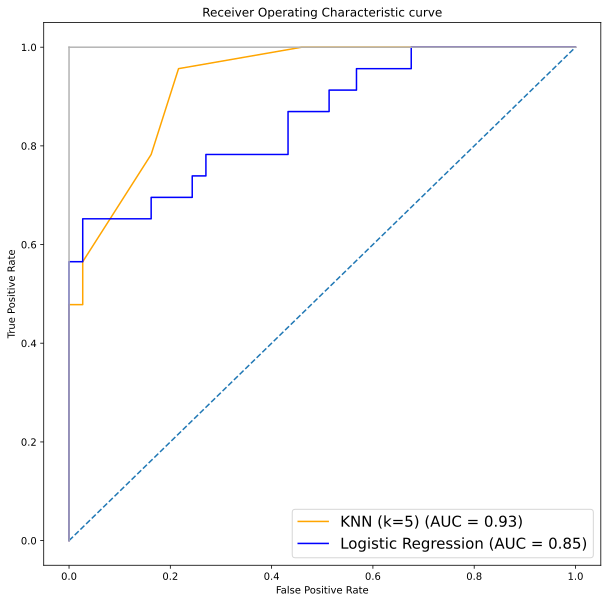

In [ ]:
#preparing test and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=0)

#Training model
classifier.fit(X_train1, y_train1) #knn
logreg.fit(X_train1, y_train1) #logistic regression

#finding predicted probabilities
y_score1 = knn.predict_proba(X_test1)[:,1]
y_score2 = logreg.predict_proba(X_test1)[:,1]

#Plotting Reciever Operating Characteristics (ROC) Curve
#Creating true and false positive rates
fpr1, tpr1, threshold1 = roc_curve(y_test1, y_score1)
fpr2, tpr2, threshold2 = roc_curve(y_test1, y_score2)
print('roc_auc_score for K-Nearest Neighbors (k=5): ', roc_auc_score(y_test1, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test1, y_score2))
print('\n')

#ROC Curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic curve')
plt.plot(fpr1, tpr1, color='orange', label='KNN (k=5) (AUC = {1:0.2f})'
    ''.format(2, roc_auc_score(y_test1, y_score1)))
plt.plot(fpr2, tpr2, color='blue', label='Logistic Regression (AUC = {1:0.2f})'
    ''.format(2, roc_auc_score(y_test1, y_score2)))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(prop={'size': 15})
plt.show()

The K-NN model is clearly better for our dataset since it has a higher Area-Under-the-Curve (0.93 approximately) than that of logistic regression (0.85 approximately).

## **Conclusion**

In this project, we have trained two classification models: K-Nearest Neighbor and Logistic Regression and found that K-NN provides a better model for our dataset. This model can predict the survival chance of patients by selecting only 7 of the features from the original dataset.

However, we were limited to a very small size of dataset (299 instances). A larger dataset would have permitted us to obtain much more reliable results.


## **References**

*   https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records
*   https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
*   Official documentations of Numpy, Pandas, Seaborn, Matplotlib